# **Prédiction de l'âge d'un opossum à l'aide de la régression**

#### Dans ce brief, vous développerez un modèle qui prédira l'âge d'un opossum à partir de ces caractéristiques.

## 1.Importation ``des`` `librairies` ``adéquates``

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns

plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import pickle
from sklearn.feature_selection import VarianceThreshold
from sklearn.neighbors import KNeighborsClassifier  #KNN
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import preprocessing
from IPython.display import clear_output
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.metrics import confusion_matrix #for confusion matrix
import sklearn.feature_extraction as feature_extraction
from sklearn.feature_extraction import DictVectorizer
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr

### 2. importation ``des données``

In [15]:
data_opossum = pd.read_csv('opossum.csv', encoding='unicode_escape')
print(data_opossum)

     case  site    Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
0       1     1    Vic   m  8.0     94.1    60.4      89.0   36.0      74.5   
1       2     1    Vic   f  6.0     92.5    57.6      91.5   36.5      72.5   
2       3     1    Vic   f  6.0     94.0    60.0      95.5   39.0      75.4   
3       4     1    Vic   f  6.0     93.2    57.1      92.0   38.0      76.1   
4       5     1    Vic   f  2.0     91.5    56.3      85.5   36.0      71.0   
..    ...   ...    ...  ..  ...      ...     ...       ...    ...       ...   
99    100     7  other   m  1.0     89.5    56.0      81.5   36.5      66.0   
100   101     7  other   m  1.0     88.6    54.7      82.5   39.0      64.4   
101   102     7  other   f  6.0     92.4    55.0      89.0   38.0      63.5   
102   103     7  other   m  4.0     91.5    55.2      82.5   36.5      62.9   
103   104     7  other   f  3.0     93.6    59.9      89.0   40.0      67.6   

     earconch   eye  chest  belly  
0        54.5  

In [16]:
data_opossum.head()

case  site  Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
0     1     1  Vic   m  8.0     94.1    60.4      89.0   36.0      74.5   
1     2     1  Vic   f  6.0     92.5    57.6      91.5   36.5      72.5   
2     3     1  Vic   f  6.0     94.0    60.0      95.5   39.0      75.4   
3     4     1  Vic   f  6.0     93.2    57.1      92.0   38.0      76.1   
4     5     1  Vic   f  2.0     91.5    56.3      85.5   36.0      71.0   

   earconch   eye  chest  belly  
0      54.5  15.2   28.0   36.0  
1      51.2  16.0   28.5   33.0  
2      51.9  15.5   30.0   34.0  
3      52.2  15.2   28.0   34.0  
4      53.2  15.1   28.5   33.0

In [17]:
data_opossum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [18]:
data_opossum.columns

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

# 3. Structure de dataset(``Variable, nan``)

In [19]:
data_opossum.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

## 4. Nettoyage ``des données``

In [20]:
"""Transforme les valeurs manquantes en chiffre"""
Sim=SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer = Sim.fit(data_opossum)
data_opossum.iloc[:,:] = Sim.transform(data_opossum)


data_opossum.head(10)

case  site  Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
0     1     1  Vic   m  8.0     94.1    60.4      89.0   36.0      74.5   
1     2     1  Vic   f  6.0     92.5    57.6      91.5   36.5      72.5   
2     3     1  Vic   f  6.0     94.0    60.0      95.5   39.0      75.4   
3     4     1  Vic   f  6.0     93.2    57.1      92.0   38.0      76.1   
4     5     1  Vic   f  2.0     91.5    56.3      85.5   36.0      71.0   
5     6     1  Vic   f  1.0     93.1    54.8      90.5   35.5      73.2   
6     7     1  Vic   m  2.0     95.3    58.2      89.5   36.0      71.5   
7     8     1  Vic   f  6.0     94.8    57.6      91.0   37.0      72.7   
8     9     1  Vic   f  9.0     93.4    56.3      91.5   37.0      72.4   
9    10     1  Vic   f  6.0     91.8    58.0      89.5   37.5      70.9   

   earconch   eye  chest  belly  
0      54.5  15.2   28.0   36.0  
1      51.2  16.0   28.5   33.0  
2      51.9  15.5   30.0   34.0  
3      52.2  15.2   28.0   34.0  
4      53.2  15.1   28.5   33.0  
5      53.6  14.2   30.0   32.0  
6      52.0  14.2   30.0   34.5  
7      53.9  14.5   29.0   34.0  
8      52.9  15.5   28.0   33.0  
9      53.4  14.4   27.5   32.0

In [21]:
data_opossum.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [22]:
data_opossum.info()
data_opossum.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       104 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  104 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


case  site    Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
99    100     7  other   m  1.0     89.5    56.0      81.5   36.5      66.0   
100   101     7  other   m  1.0     88.6    54.7      82.5   39.0      64.4   
101   102     7  other   f  6.0     92.4    55.0      89.0   38.0      63.5   
102   103     7  other   m  4.0     91.5    55.2      82.5   36.5      62.9   
103   104     7  other   f  3.0     93.6    59.9      89.0   40.0      67.6   

     earconch   eye  chest  belly  
99       46.8  14.8   23.0   27.0  
100      48.0  14.0   25.0   33.0  
101      45.4  13.0   25.0   30.0  
102      45.9  15.4   25.0   29.0  
103      46.0  14.8   28.5   33.5

### Encodage de la colonne ``Pop``

In [23]:
"""Transforme les lettres en chiffres"""
le = preprocessing.LabelEncoder()


data_opossum.Pop = le.fit_transform(data_opossum.Pop)
#.columns()
list_enc_pop=le.classes_.copy()
data_opossum.head()

case  site  Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
0     1     1    0   m  8.0     94.1    60.4      89.0   36.0      74.5   
1     2     1    0   f  6.0     92.5    57.6      91.5   36.5      72.5   
2     3     1    0   f  6.0     94.0    60.0      95.5   39.0      75.4   
3     4     1    0   f  6.0     93.2    57.1      92.0   38.0      76.1   
4     5     1    0   f  2.0     91.5    56.3      85.5   36.0      71.0   

   earconch   eye  chest  belly  
0      54.5  15.2   28.0   36.0  
1      51.2  16.0   28.5   33.0  
2      51.9  15.5   30.0   34.0  
3      52.2  15.2   28.0   34.0  
4      53.2  15.1   28.5   33.0

In [25]:
print(list_enc_pop)

['Vic' 'other']


### Encodage de la colonne ``sex``

In [26]:
data_opossum.sex = le.fit_transform(data_opossum.sex)
list_enc_sex = le.classes_.copy()
data_opossum.head()

case  site  Pop  sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
0     1     1    0    1  8.0     94.1    60.4      89.0   36.0      74.5   
1     2     1    0    0  6.0     92.5    57.6      91.5   36.5      72.5   
2     3     1    0    0  6.0     94.0    60.0      95.5   39.0      75.4   
3     4     1    0    0  6.0     93.2    57.1      92.0   38.0      76.1   
4     5     1    0    0  2.0     91.5    56.3      85.5   36.0      71.0   

   earconch   eye  chest  belly  
0      54.5  15.2   28.0   36.0  
1      51.2  16.0   28.5   33.0  
2      51.9  15.5   30.0   34.0  
3      52.2  15.2   28.0   34.0  
4      53.2  15.1   28.5   33.0

In [27]:
print(list_enc_sex)

['f' 'm']


In [28]:
data_opossum.describe()

case        site         Pop         sex         age     hdlngth  \
count  104.000000  104.000000  104.000000  104.000000  104.000000  104.000000   
mean    52.500000    3.625000    0.557692    0.586538    3.817308   92.602885   
std     30.166206    2.349086    0.499066    0.494839    1.894112    3.573349   
min      1.000000    1.000000    0.000000    0.000000    1.000000   82.500000   
25%     26.750000    1.000000    0.000000    0.000000    2.750000   90.675000   
50%     52.500000    3.000000    1.000000    1.000000    3.000000   92.800000   
75%     78.250000    6.000000    1.000000    1.000000    5.000000   94.725000   
max    104.000000    7.000000    1.000000    1.000000    9.000000  103.100000   

           skullw    totlngth       taill    footlgth    earconch         eye  \
count  104.000000  104.000000  104.000000  104.000000  104.000000  104.000000   
mean    56.883654   87.088462   37.009615   68.504808   48.130769   15.046154   
std      3.113426    4.310549    1.959518    4.398552    4.109380    1.050374   
min     50.000000   75.000000   32.000000   60.300000   40.300000   12.800000   
25%     54.975000   84.000000   35.875000   64.650000   44.800000   14.400000   
50%     56.350000   88.000000   37.000000   68.100000   46.800000   14.900000   
75%     58.100000   90.000000   38.000000   72.550000   52.000000   15.725000   
max     68.600000   96.500000   43.000000   77.900000   56.200000   17.800000   

            chest       belly  
count  104.000000  104.000000  
mean    27.000000   32.586538  
std      2.045597    2.761949  
min     22.000000   25.000000  
25%     25.500000   31.000000  
50%     27.000000   32.500000  
75%     28.000000   34.125000  
max     32.000000   40.000000

In [29]:
data_opossum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    int64  
 3   sex       104 non-null    int64  
 4   age       104 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  104 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 11.5 KB


In [30]:
data_opossum.sum()

case        5460.0
site         377.0
Pop           58.0
sex           61.0
age          397.0
hdlngth     9630.7
skullw      5915.9
totlngth    9057.2
taill       3849.0
footlgth    7124.5
earconch    5005.6
eye         1564.8
chest       2808.0
belly       3389.0
dtype: float64

count    104.000000
mean       3.817308
std        1.894112
min        1.000000
25%        2.750000
50%        3.000000
75%        5.000000
max        9.000000
Name: age, dtype: float64


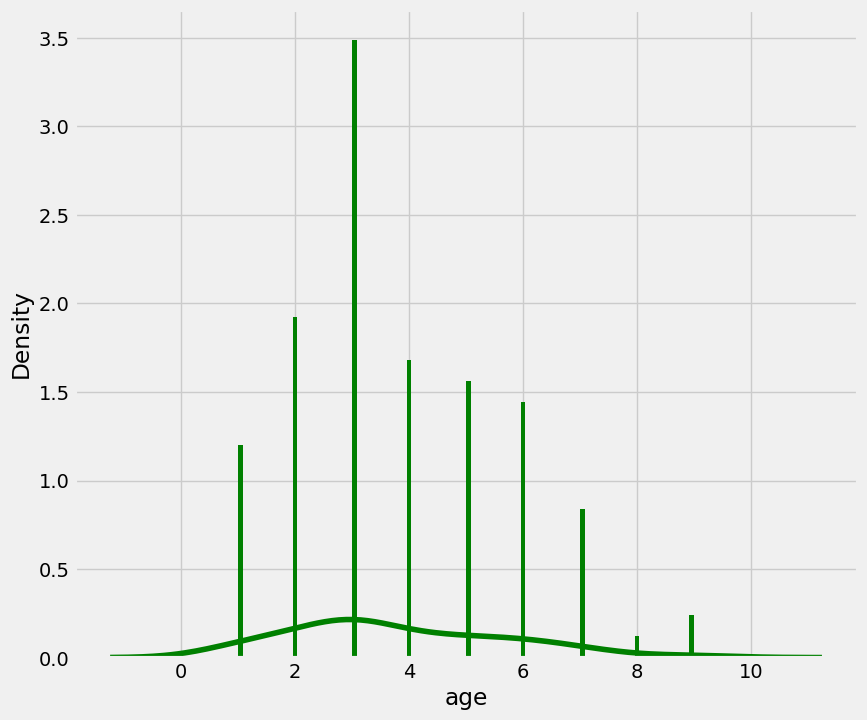

In [39]:
print(data_opossum['age'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(data_opossum['age'], color='g', bins=100, hist_kws={'alpha': 1});

### Distribution

In [31]:
list(set(data_opossum.dtypes.tolist()))

[dtype('int64'), dtype('float64')]

In [32]:
data_opossum_num = data_opossum.select_dtypes(include = [ 'int64', 'float64'])
"""Transforme les données en float et int"""
data_opossum_num.sum()

case        5460.0
site         377.0
Pop           58.0
sex           61.0
age          397.0
hdlngth     9630.7
skullw      5915.9
totlngth    9057.2
taill       3849.0
footlgth    7124.5
earconch    5005.6
eye         1564.8
chest       2808.0
belly       3389.0
dtype: float64

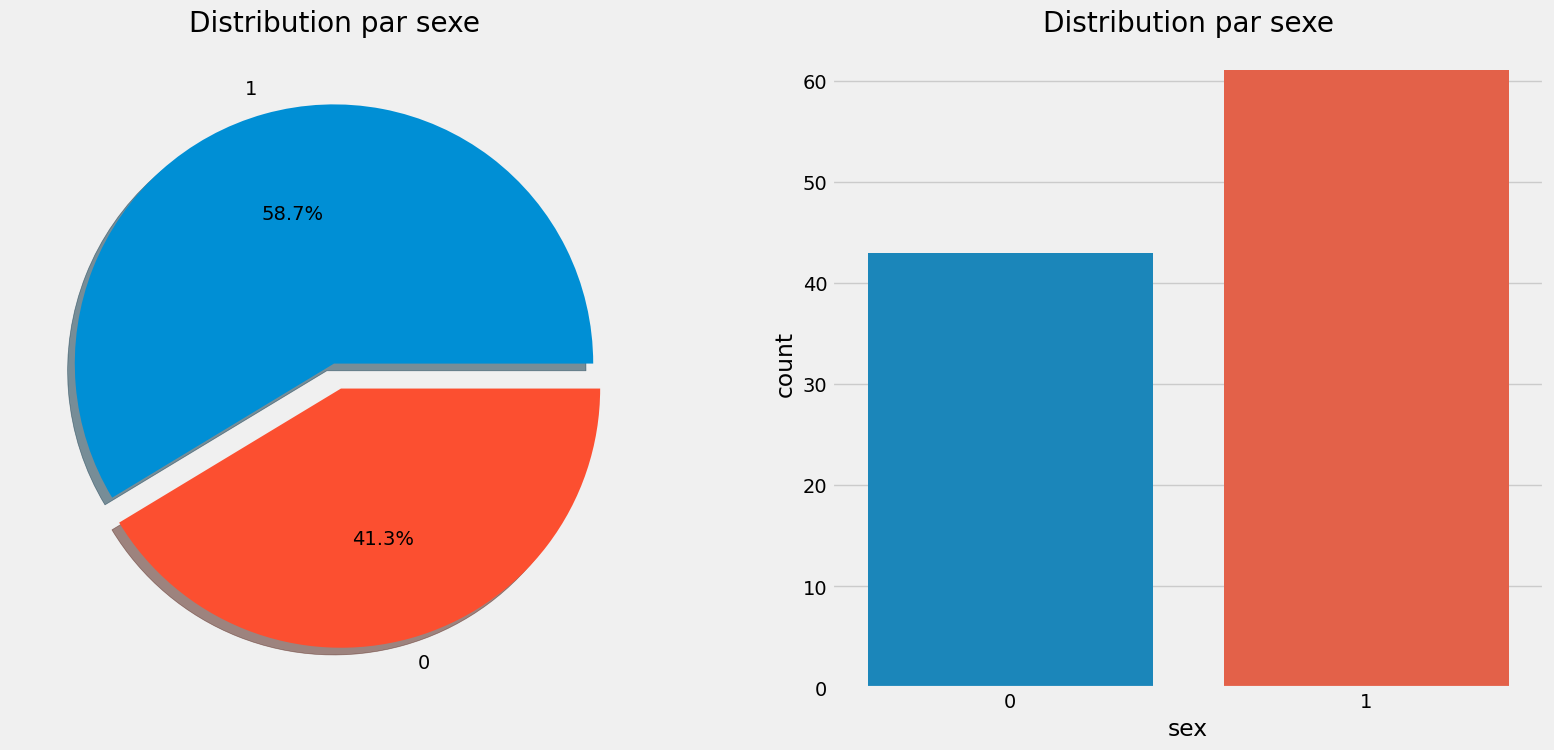

In [44]:
#données groupées des deux sex .
f,ax=plt.subplots(1,2,figsize=(18,8))
data_opossum['sex'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Distribution par sexe')
ax[0].set_ylabel('')
sns.countplot(data=data_opossum, x='sex', ax=ax[1])
ax[1].set_title('Distribution par sexe')
#plt.title('Distribution par sexe')
plt.show()

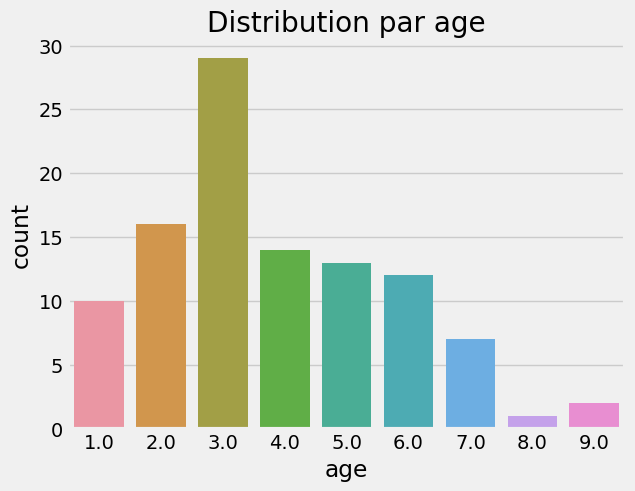

In [45]:
sns.countplot(data=data_opossum, x='age')
plt.title('Distribution par age')
plt.show()

In [40]:
list(set(data_opossum.dtypes.tolist()))

[dtype('int64'), dtype('float64')]

In [46]:
df_num = data_opossum.select_dtypes(include = ['float64', 'int64'])
df_num.head()

case  site  Pop  sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
0     1     1    0    1  8.0     94.1    60.4      89.0   36.0      74.5   
1     2     1    0    0  6.0     92.5    57.6      91.5   36.5      72.5   
2     3     1    0    0  6.0     94.0    60.0      95.5   39.0      75.4   
3     4     1    0    0  6.0     93.2    57.1      92.0   38.0      76.1   
4     5     1    0    0  2.0     91.5    56.3      85.5   36.0      71.0   

   earconch   eye  chest  belly  
0      54.5  15.2   28.0   36.0  
1      51.2  16.0   28.5   33.0  
2      51.9  15.5   30.0   34.0  
3      52.2  15.2   28.0   34.0  
4      53.2  15.1   28.5   33.0

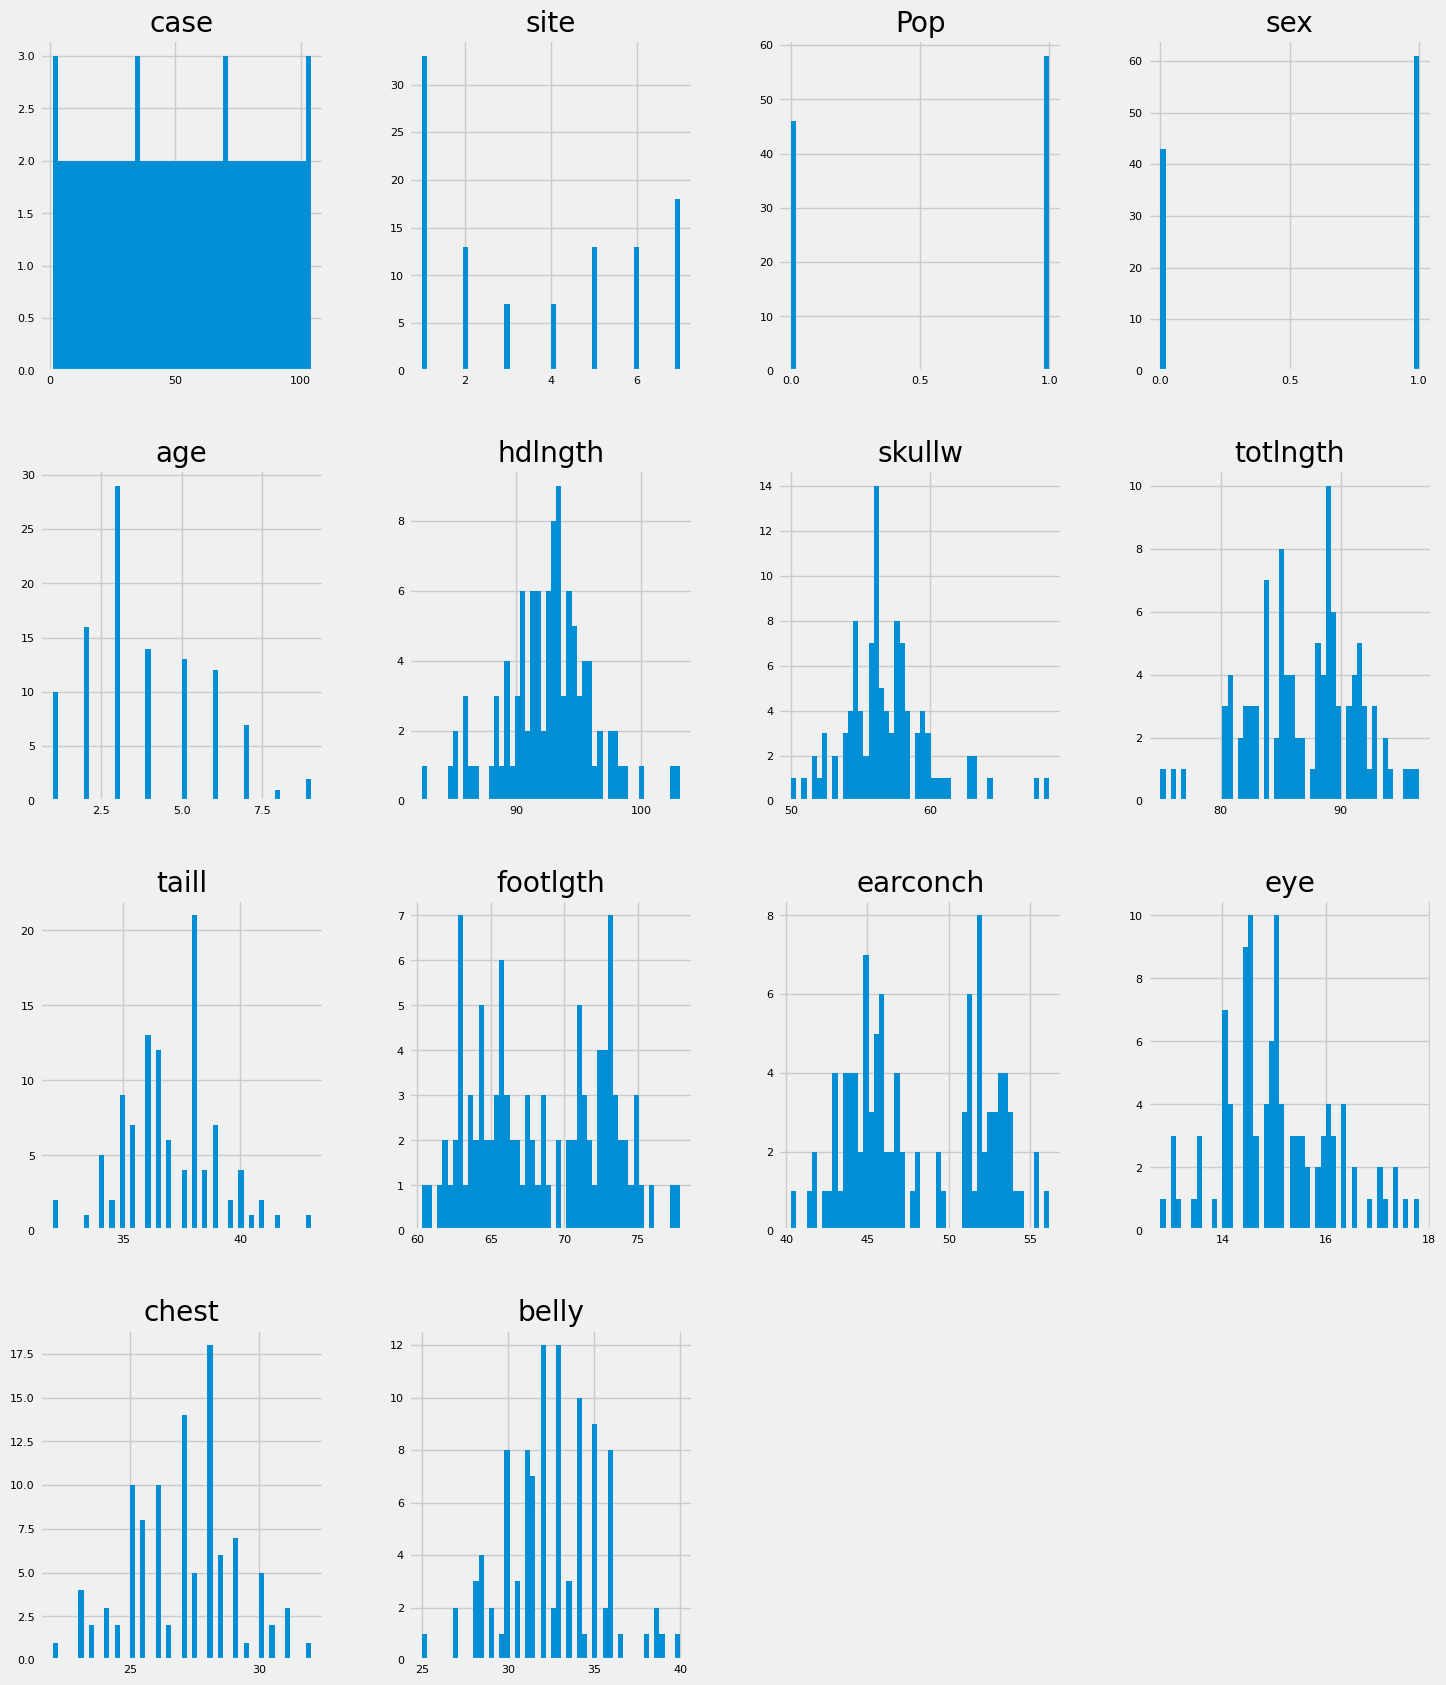

In [47]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [49]:
pd.crosstab(data_opossum.age, data_opossum.sex, margins = True).style.background_gradient(cmap='summer_r')

## 7. Correlation entre variables

In [58]:
data_opossum_corr = data_opossum.corr()['belly'][:-1] # -1 because the latest row is SalePrice
golden_features_list = data_opossum_corr[abs(data_opossum_corr) > 0.5].sort_values(ascending=False)
print("Il y a {} des valeurs fortement corrélées avec belly:\n{}".format(len(golden_features_list), golden_features_list))

Il y a 3 des valeurs fortement corrélées avec belly:
chest       0.606170
hdlngth     0.562663
totlngth    0.519465
Name: belly, dtype: float64


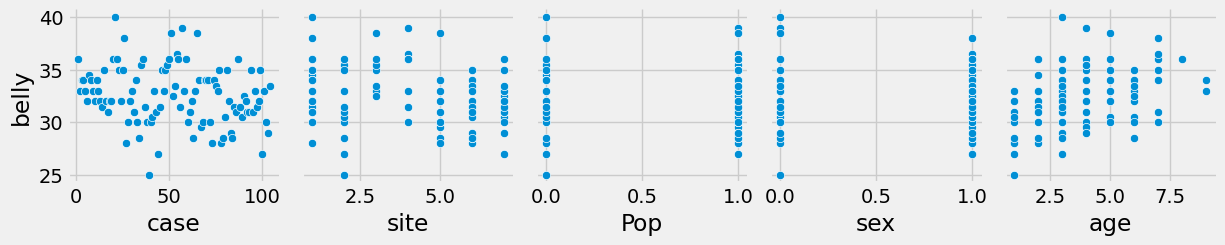

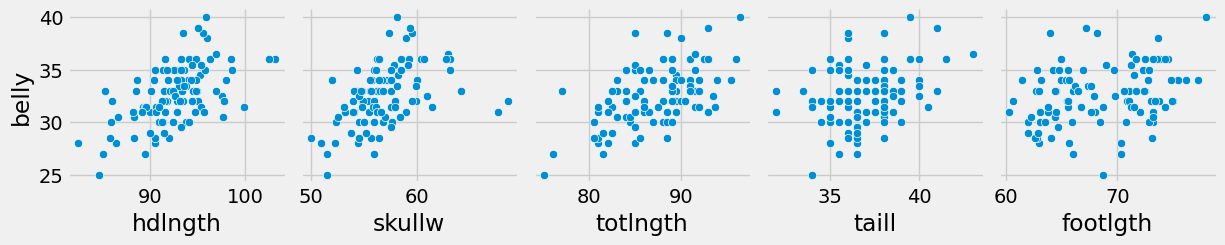

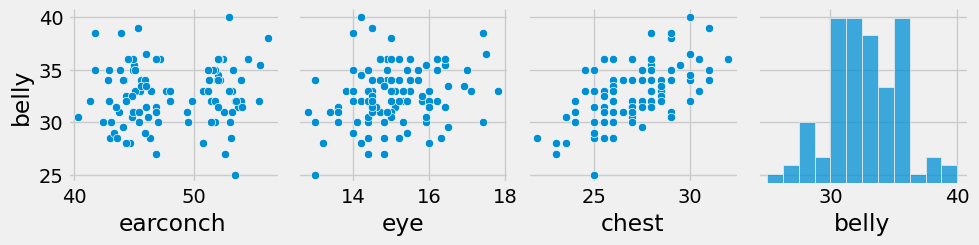

In [56]:
for i in range(0, len(data_opossum.columns), 5):
    sns.pairplot(data=data_opossum,
                x_vars=data_opossum.columns[i:i+5],
                y_vars=['belly'])

In [52]:
import operator

individual_features_df = []
for i in range(0, len(data_opossum.columns) - 1): # -1 because the last column is belly
    tmpDf = data_opossum[[data_opossum.columns[i], 'belly']]
    tmpDf = tmpDf[tmpDf[data_opossum.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['belly'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

           case: -0.21167124821070146
           site: -0.1752660897156189
            Pop:             nan
            sex:             nan
       earconch: 0.06652733508636254
            eye: 0.23571610264055318
       footlgth: 0.29214081433476563
          taill: 0.2944925506745972
            age: 0.35009437425323775
         skullw: 0.45183785573637325
       totlngth: 0.5194653560295284
        hdlngth: 0.5626625211840814
          chest: 0.6061696170151337


In [60]:
golden_features_list = [key for key, value in all_correlations if abs(value) >= 0.5]
print("There is {} strongly correlated values with belly:\n{}".format(len(golden_features_list), golden_features_list))

There is 3 strongly correlated values with belly:
['totlngth', 'hdlngth', 'chest']


### Feature to ``feature relationship``

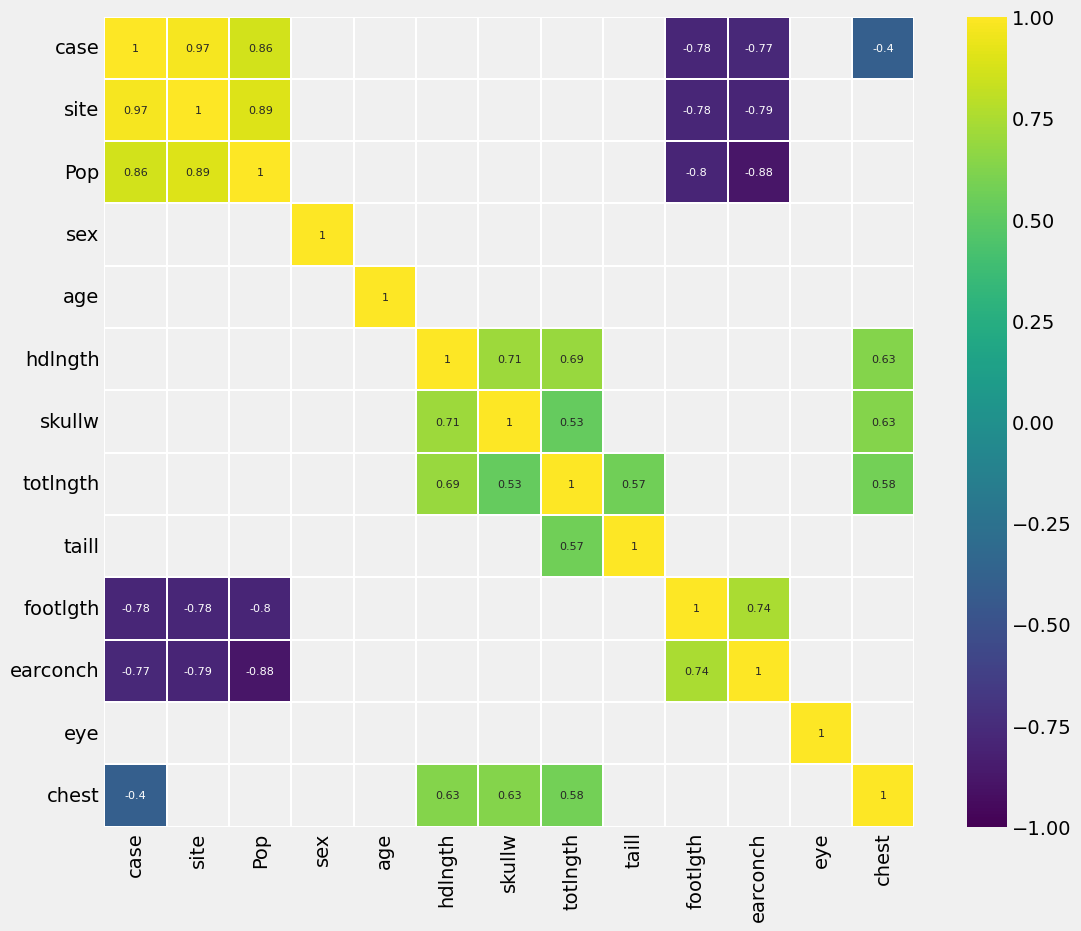

In [61]:
corr = data_opossum.drop('belly', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [62]:
quantitative_features_list = ['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']
data_opossum_quantitative_values = data_opossum[quantitative_features_list]
data_opossum_quantitative_values.head()

case  site  Pop  sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
0     1     1    0    1  8.0     94.1    60.4      89.0   36.0      74.5   
1     2     1    0    0  6.0     92.5    57.6      91.5   36.5      72.5   
2     3     1    0    0  6.0     94.0    60.0      95.5   39.0      75.4   
3     4     1    0    0  6.0     93.2    57.1      92.0   38.0      76.1   
4     5     1    0    0  2.0     91.5    56.3      85.5   36.0      71.0   

   earconch   eye  chest  belly  
0      54.5  15.2   28.0   36.0  
1      51.2  16.0   28.5   33.0  
2      51.9  15.5   30.0   34.0  
3      52.2  15.2   28.0   34.0  
4      53.2  15.1   28.5   33.0

In [63]:
features_to_analyse = [x for x in quantitative_features_list if x in golden_features_list]
features_to_analyse.append('belly')
features_to_analyse

['hdlngth', 'totlngth', 'chest', 'belly']

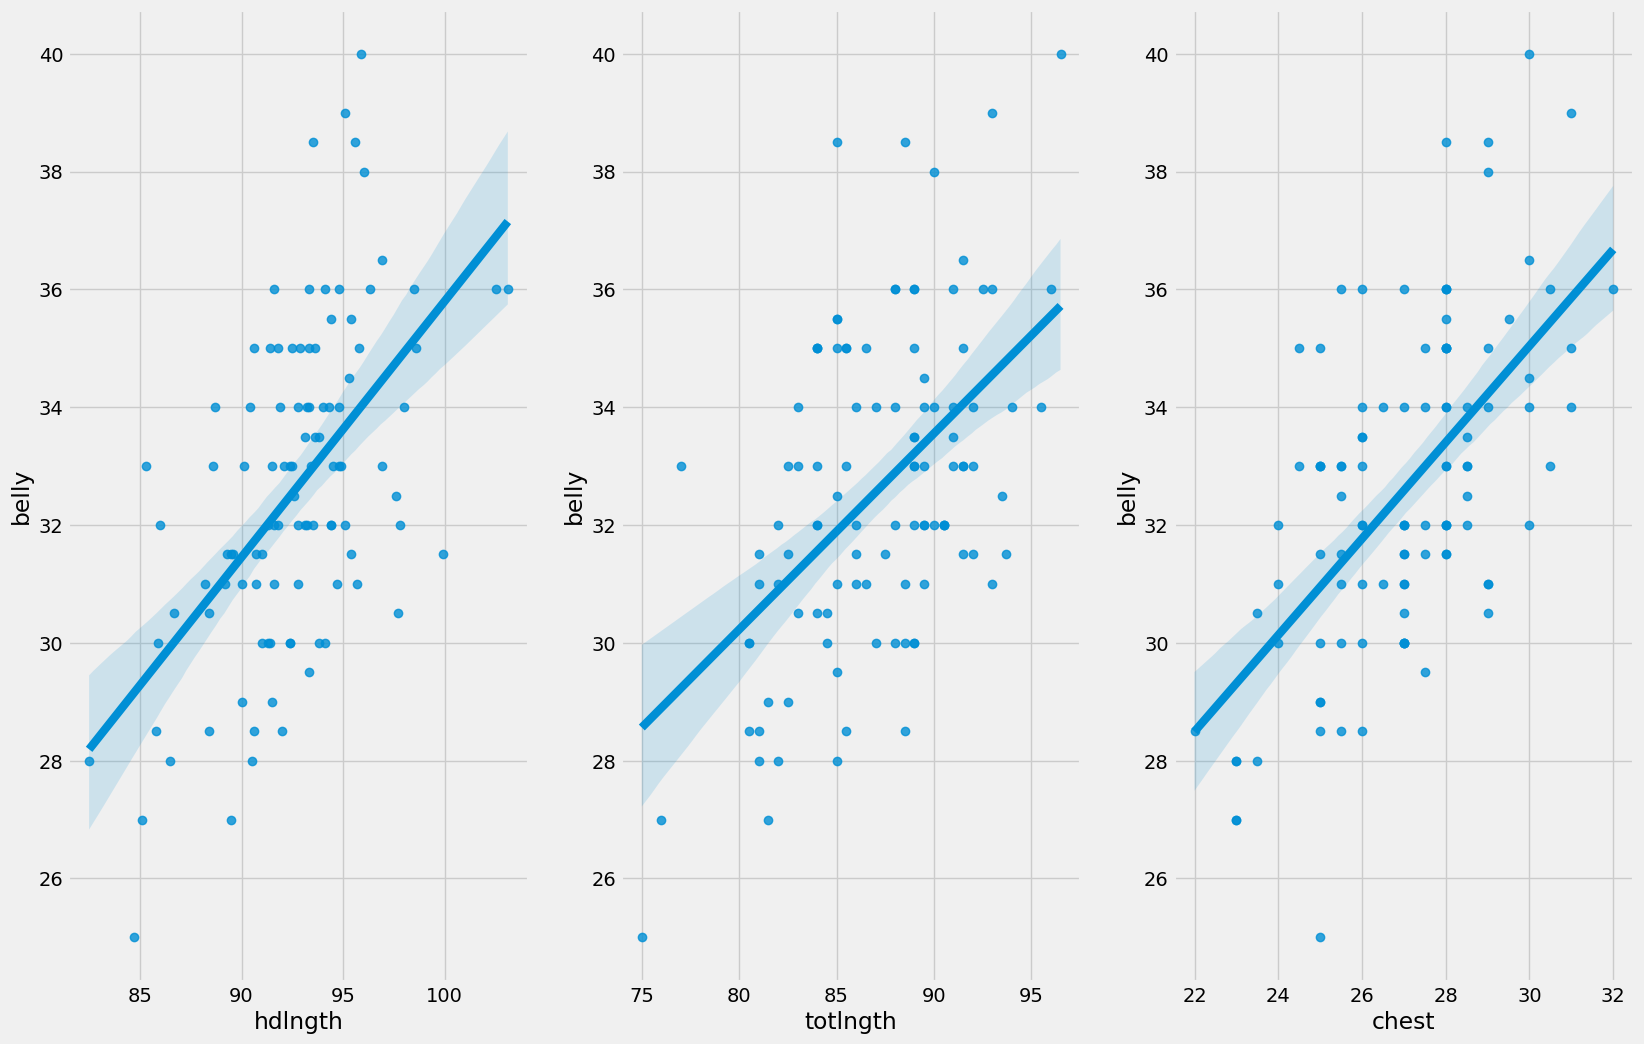

In [66]:
fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y='belly', data=data_opossum[features_to_analyse], ax=ax)

In [67]:
# quantitative_features_list[:-1] as the last column is SalePrice and we want to keep it
categorical_features = [a for a in quantitative_features_list[:-1] + data_opossum.columns.tolist() if (a not in quantitative_features_list[:-1]) or (a not in data_opossum.columns.tolist())]
df_categ = data_opossum[categorical_features]
df_categ.head()

belly
0   36.0
1   33.0
2   34.0
3   34.0
4   33.0

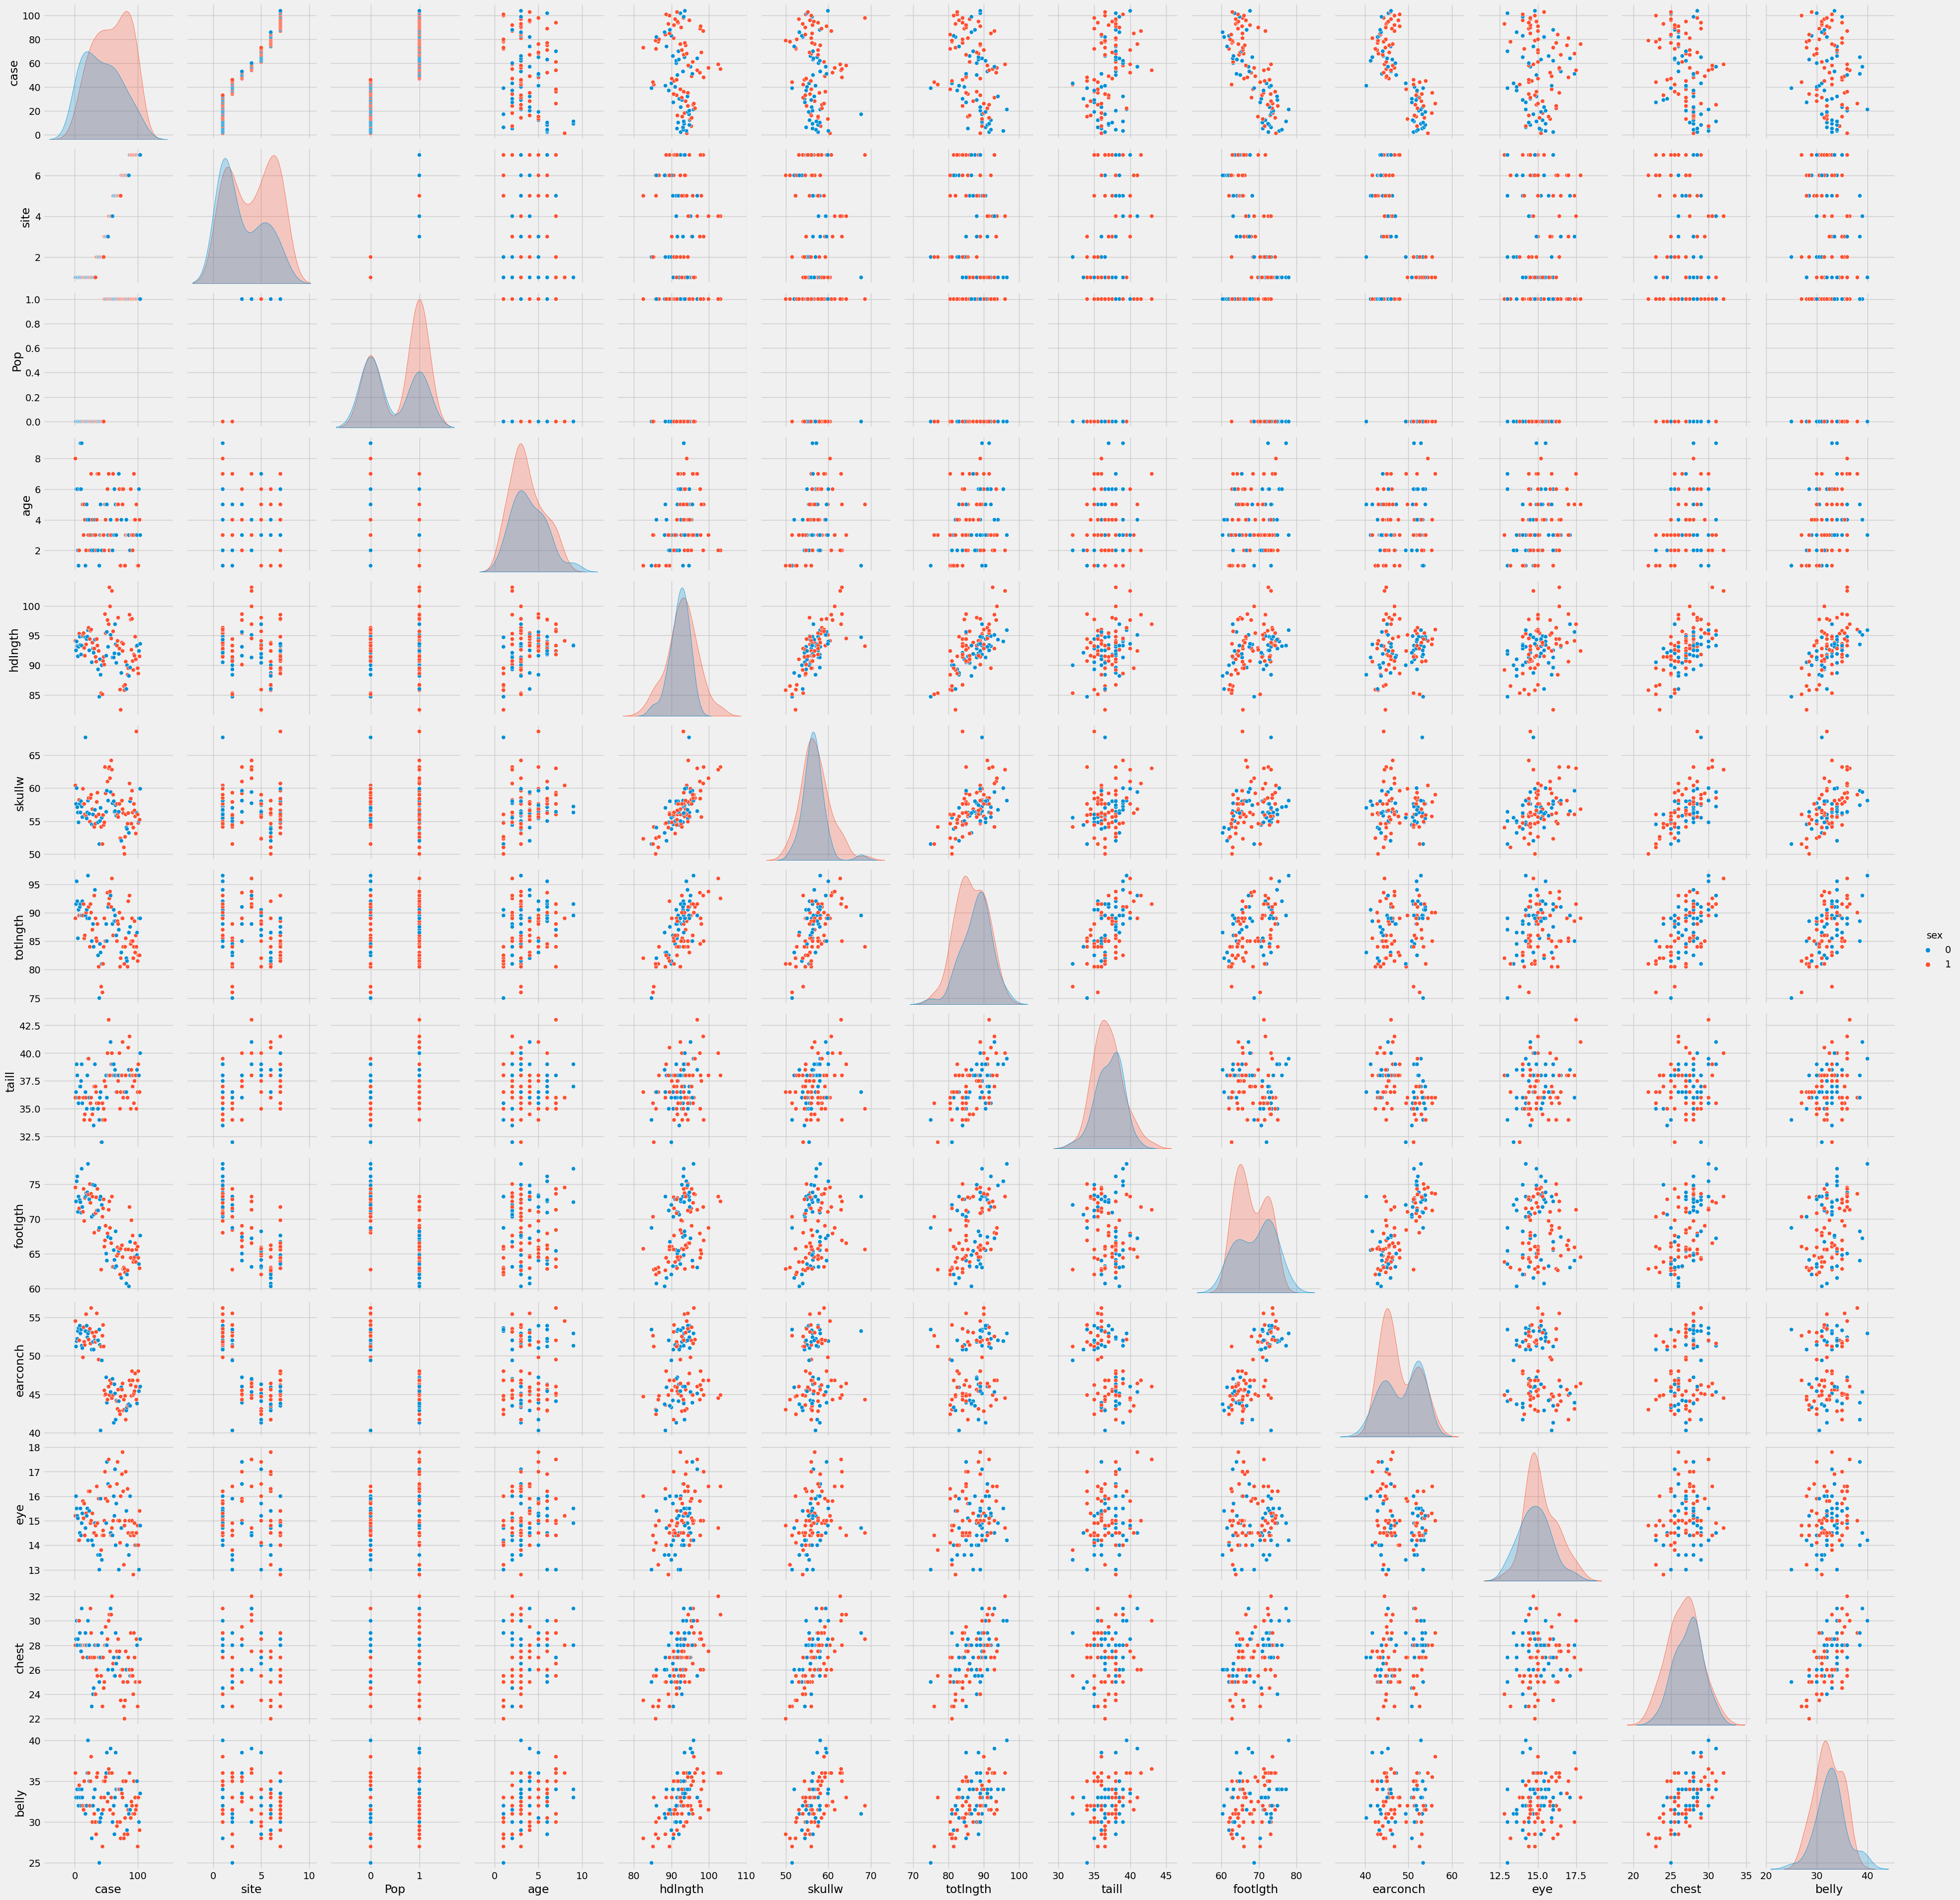

In [76]:
sns.pairplot(data=data_opossum, height=3, hue ='sex')

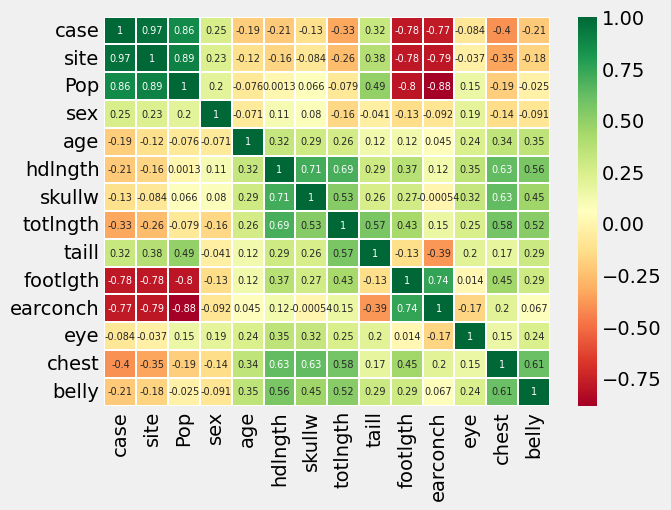

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

In [77]:
#etude de la correlation
sns.heatmap(data_opossum.corr(), annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':7})
plt.show()
data_opossum.columns

In [68]:
data_opossum_not_num = df_categ.select_dtypes(include = ['O'])
print('There is {} non numerical features including:\n{}'.format(len(data_opossum_not_num.columns), data_opossum_not_num.columns.tolist()))

There is 0 non numerical features including:
[]


In [69]:
# seed random number generator
seed(1)
# prepare data
data1 = data_opossum["sex"]
data2 = data_opossum["belly"]
# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.091


In [70]:
# seed random number generator
seed(2)
# prepare data
data1 = data_opossum["age"]
data2 = data_opossum["belly"]
# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.350


In [71]:
# seed random number generator
seed(3)
# prepare data
data1 = data_opossum["earconch"]
data2 = data_opossum["eye"]
# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.165


In [72]:
# seed random number generator
seed(4)
# prepare data
data1 = data_opossum["sex"]
data2 = data_opossum["age"]
# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.071


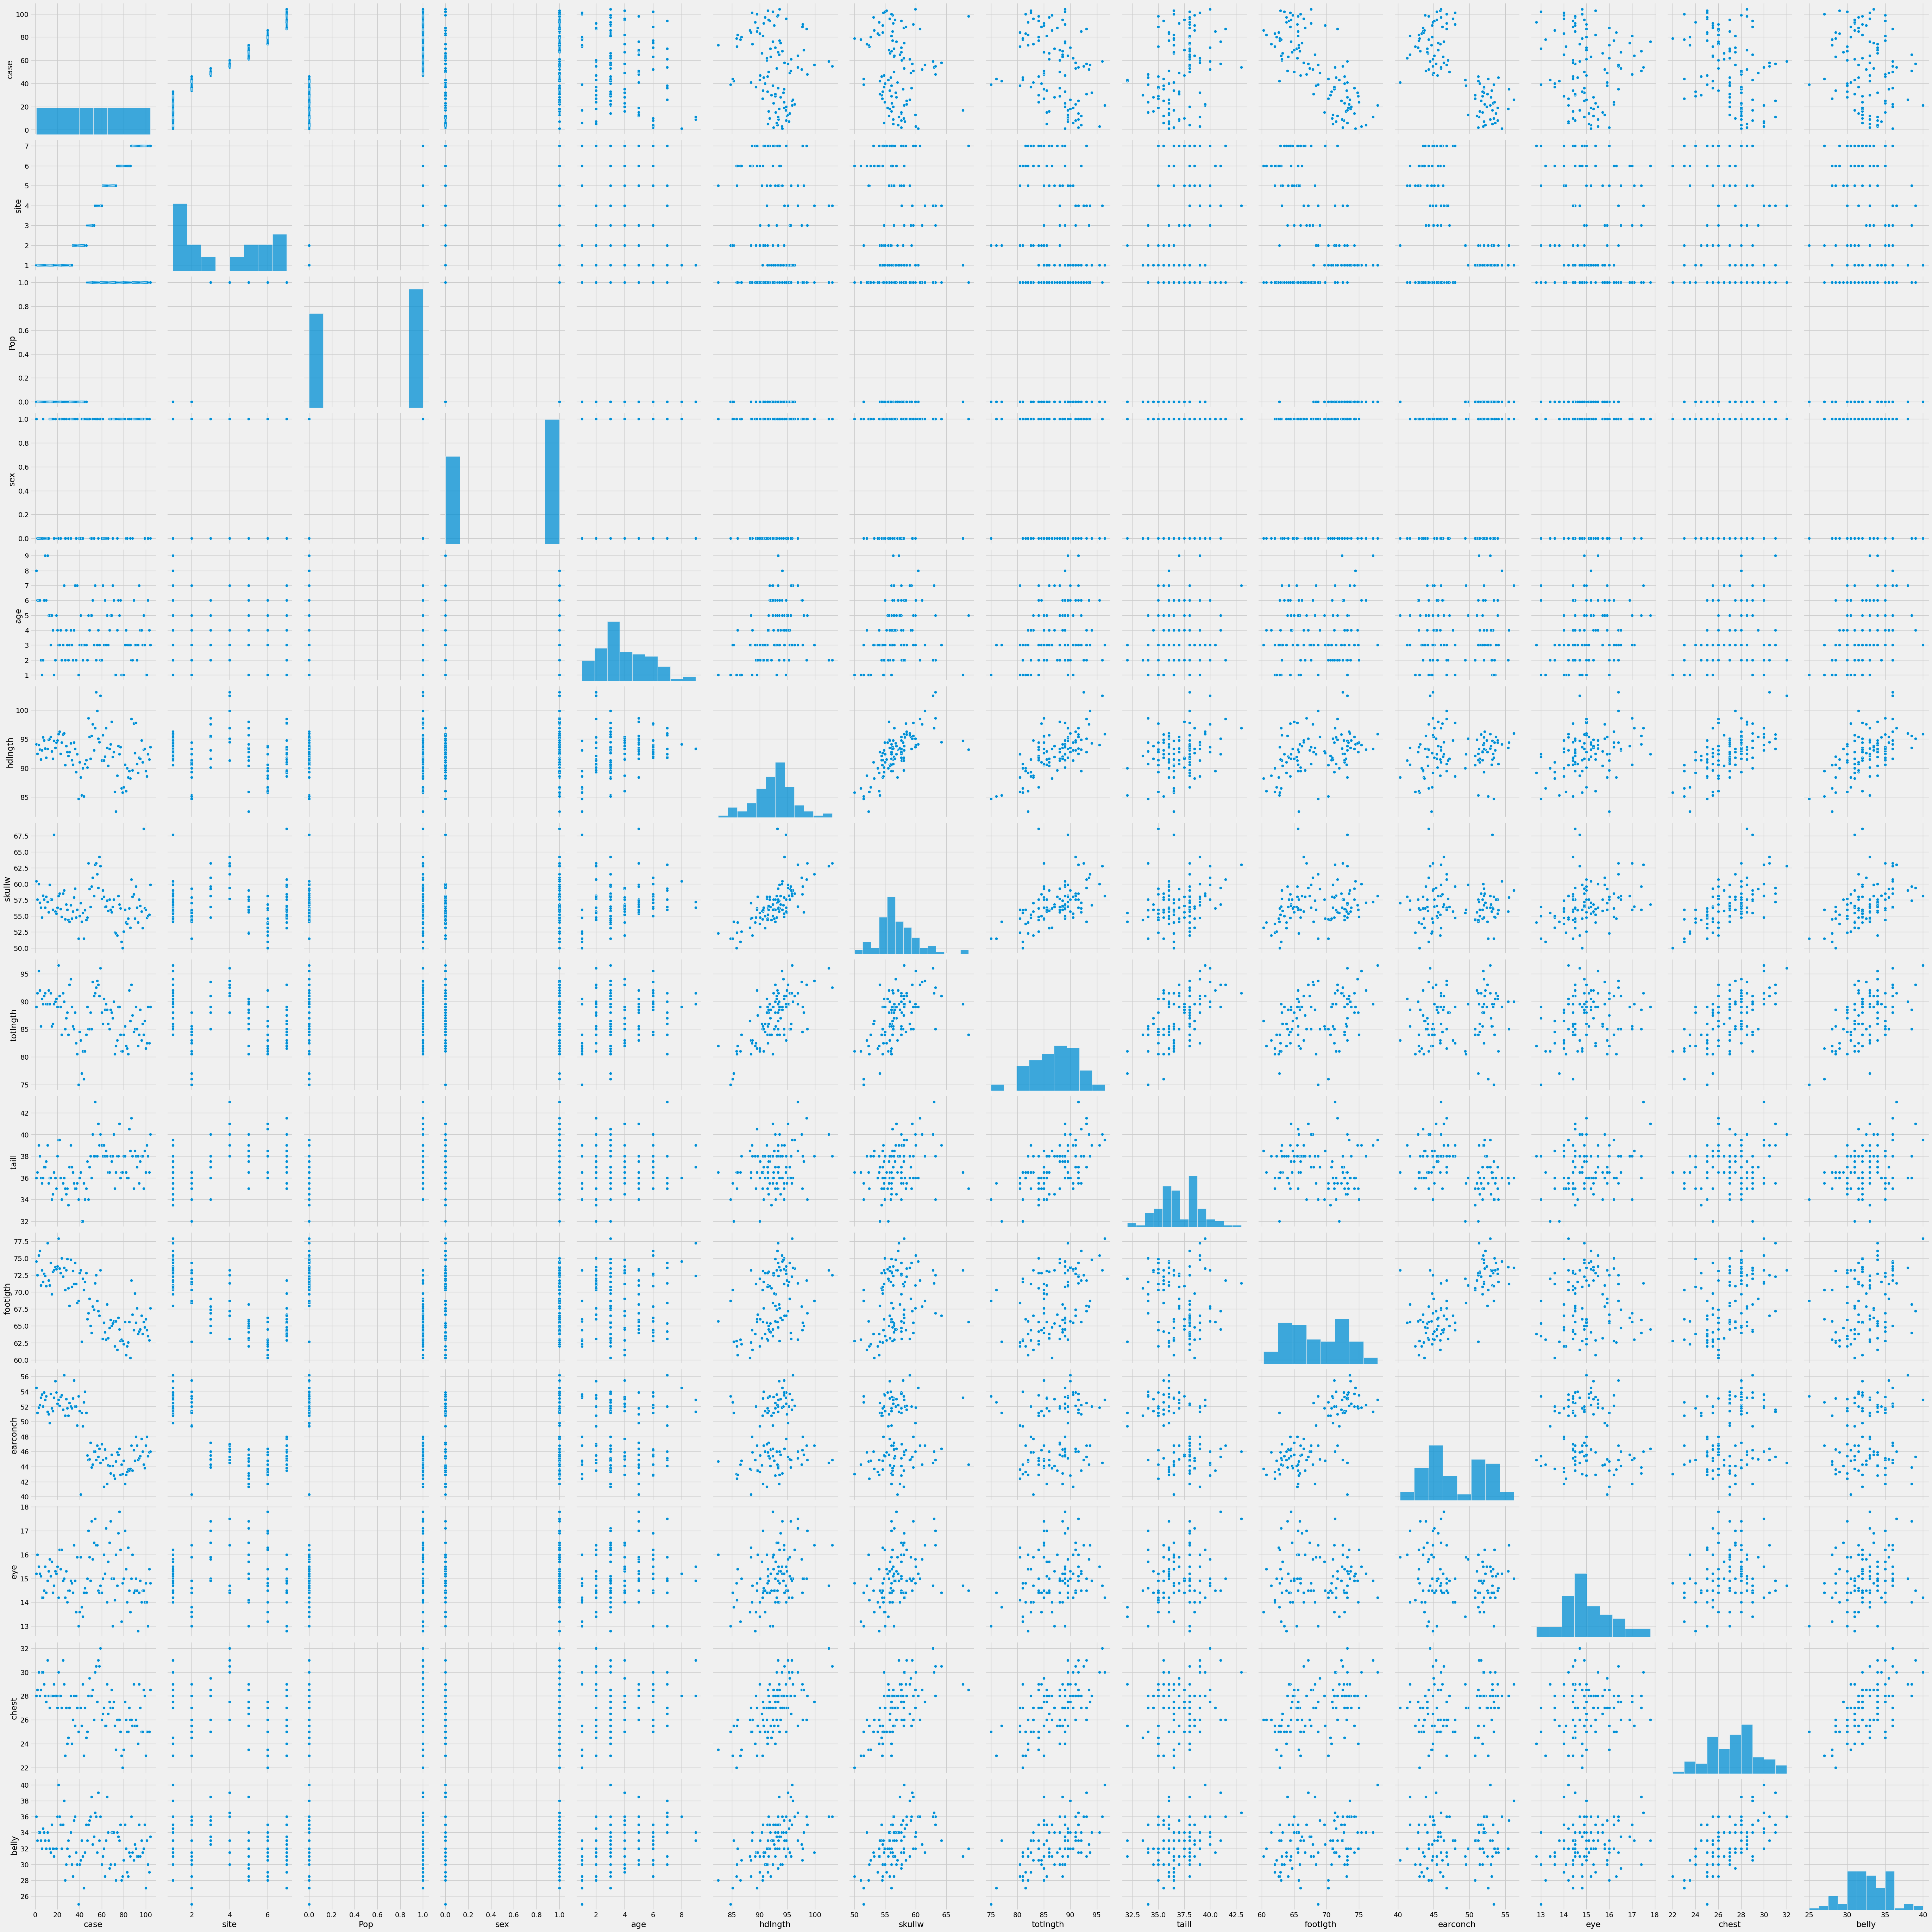

In [73]:
sns.pairplot(data=data_opossum, height=4)

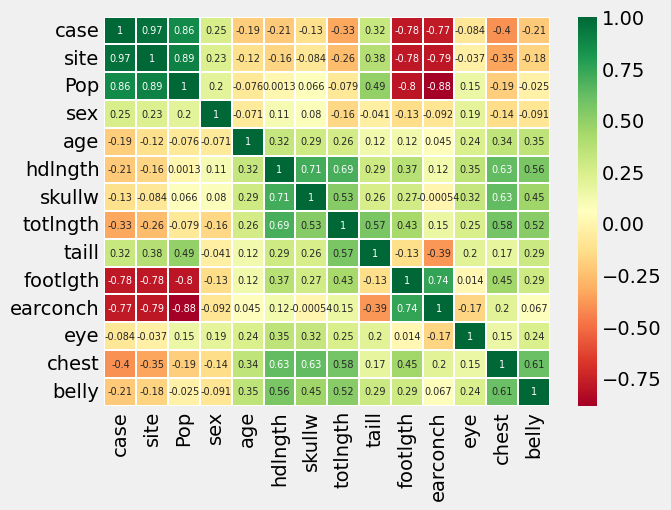

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

In [74]:
#etude de la correlation
sns.heatmap(data_opossum.corr(), annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':7})
plt.show()
data_opossum.columns

### Outlier

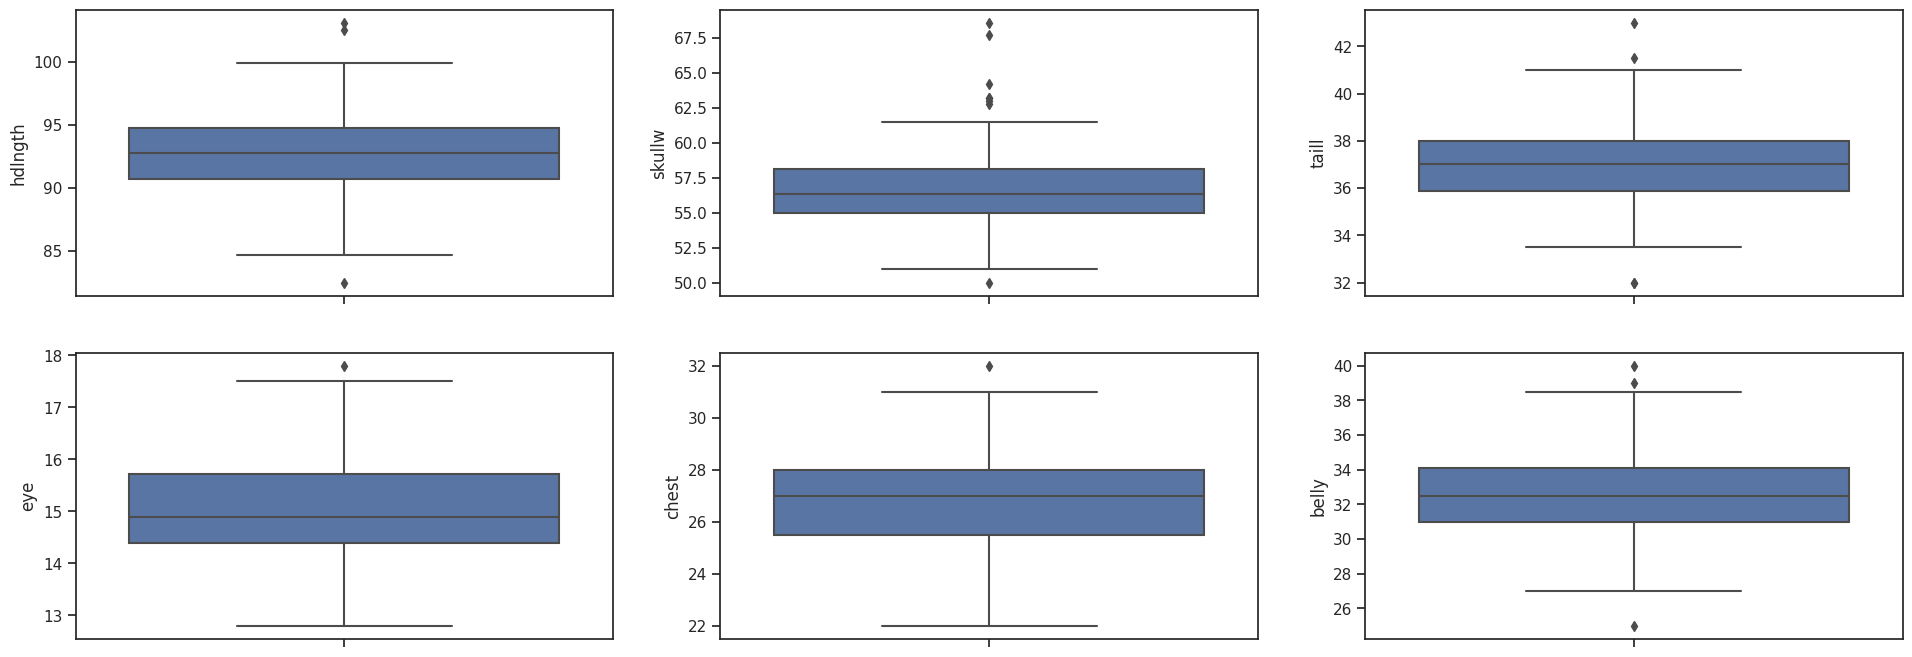

In [78]:
# Visualiser les outliers avec boxplot()
sns.set(style="ticks") 
plt.figure(figsize=(21,12))
plt.subplot(3,3,1)
sns.boxplot(data=data_opossum, y=data_opossum['hdlngth'])
plt.subplot(3,3,2)
sns.boxplot(data=data_opossum, y=data_opossum['skullw'])
plt.subplot(3,3,3)
sns.boxplot(data=data_opossum, y=data_opossum['taill'])
plt.subplot(3,3,4)
sns.boxplot(data=data_opossum, y=data_opossum['eye'])
plt.subplot(3,3,5)
sns.boxplot(data=data_opossum, y=data_opossum['chest'])
plt.subplot(3,3,6)
sns.boxplot(data=data_opossum, y=data_opossum['belly'])
plt.show()

In [79]:
data_opossum.columns

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

In [80]:
def remove_outliers(data_opossum, col):
    """Function that removes outliers under Q1 and above Q3."""
    #On utilise l'IQR
    Q1 = np.percentile(data_opossum[col], 25,method = 'midpoint')
    Q3 = np.percentile(data_opossum[col], 75,method = 'midpoint')
    IQR = Q3 - Q1

    max_v=Q3+1.5*IQR
    min_v=Q1-1.5*IQR

    # Upper bound
    ind_upper = np.where(data_opossum[col] >= max_v)
    # Lower bound
    ind_lower = np.where(data_opossum[col] > min_v)

    # number of rows before removal
    nb_of_rows_before = data_opossum.shape[0]

    # Suppresion des Outliers
    data_opossum.drop(data_opossum[data_opossum[col] > max_v].index, inplace = True)
    data_opossum.drop(data_opossum[data_opossum[col] < min_v].index, inplace = True)
    
    print(f"'{col}' => Q1 : {Q1} - Q3 : {Q3} - Min : {min_v} - Max : {max_v}")
    
    # number of rows after removal
    nb_of_rows_after = data_opossum.shape[0]
    nb_of_rows_removed = nb_of_rows_before - nb_of_rows_after

    # number of rows removed from dataset 
    print(f"{nb_of_rows_removed} outliers were removed in '{col}'")

In [81]:
remove_outliers(data_opossum, 'hdlngth')
remove_outliers(data_opossum, 'skullw')
remove_outliers(data_opossum, 'totlngth')
remove_outliers(data_opossum, 'taill')
remove_outliers(data_opossum, 'footlgth')
remove_outliers(data_opossum, 'earconch')
remove_outliers(data_opossum, 'eye')
remove_outliers(data_opossum, 'chest')
remove_outliers(data_opossum, 'belly')

'hdlngth' => Q1 : 90.65 - Q3 : 94.75 - Min : 84.50000000000001 - Max : 100.89999999999999
3 outliers were removed in 'hdlngth'
'skullw' => Q1 : 55.0 - Q3 : 58.1 - Min : 50.349999999999994 - Max : 62.75
6 outliers were removed in 'skullw'
'totlngth' => Q1 : 84.0 - Q3 : 89.75 - Min : 75.375 - Max : 98.375
1 outliers were removed in 'totlngth'
'taill' => Q1 : 36.0 - Q3 : 38.0 - Min : 33.0 - Max : 41.0
3 outliers were removed in 'taill'
'footlgth' => Q1 : 64.5 - Q3 : 72.75 - Min : 52.125 - Max : 85.125
0 outliers were removed in 'footlgth'
'earconch' => Q1 : 44.849999999999994 - Q3 : 52.0 - Min : 34.124999999999986 - Max : 62.72500000000001
0 outliers were removed in 'earconch'
'eye' => Q1 : 14.4 - Q3 : 15.7 - Min : 12.450000000000003 - Max : 17.65
1 outliers were removed in 'eye'
'chest' => Q1 : 25.5 - Q3 : 28.0 - Min : 21.75 - Max : 31.75
0 outliers were removed in 'chest'
'belly' => Q1 : 31.0 - Q3 : 34.0 - Min : 26.5 - Max : 38.5
2 outliers were removed in 'belly'


In [82]:
print(data_opossum.age)

0      8.0
1      6.0
2      6.0
3      6.0
4      2.0
      ... 
99     1.0
100    1.0
101    6.0
102    4.0
103    3.0
Name: age, Length: 88, dtype: float64


## 7. Split ``du dataset``

### 1. Separation ``de données``

In [83]:
X = data_opossum.drop(['age', 'sex', 'Pop'], axis=1)
y = data_opossum['age']

In [84]:
X.head()

case  site  hdlngth  skullw  totlngth  taill  footlgth  earconch   eye  \
0     1     1     94.1    60.4      89.0   36.0      74.5      54.5  15.2   
1     2     1     92.5    57.6      91.5   36.5      72.5      51.2  16.0   
2     3     1     94.0    60.0      95.5   39.0      75.4      51.9  15.5   
3     4     1     93.2    57.1      92.0   38.0      76.1      52.2  15.2   
4     5     1     91.5    56.3      85.5   36.0      71.0      53.2  15.1   

   chest  belly  
0   28.0   36.0  
1   28.5   33.0  
2   30.0   34.0  
3   28.0   34.0  
4   28.5   33.0

In [85]:
y.head()

0    8.0
1    6.0
2    6.0
3    6.0
4    2.0
Name: age, dtype: float64

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
# Colonnes
X_train_col = list(X_train.columns)
X_train_col

['case',
 'site',
 'hdlngth',
 'skullw',
 'totlngth',
 'taill',
 'footlgth',
 'earconch',
 'eye',
 'chest',
 'belly']

## 8. Choix ``du model``

In [88]:
from sklearn.metrics import mean_squared_error
from sklearn import svm

In [89]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(X_train,y_train,)
prediction1=model.predict(X_test)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,y_test))

Accuracy for rbf SVM is  0.25925925925925924


In [90]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(X_train,y_train)
prediction2=model.predict(X_test)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,y_test))

Accuracy for linear SVM is 0.1111111111111111


In [91]:
model = LogisticRegression()
model.fit(X_train,y_train)
prediction3=model.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,y_test))

The accuracy of the Logistic Regression is 0.2222222222222222


In [92]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
prediction4=model.predict(X_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,y_test))

The accuracy of the Decision Tree is 0.2222222222222222


In [93]:
model=KNeighborsClassifier() 
model.fit(X_train,y_train)
prediction5=model.predict(X_test)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,y_test))

The accuracy of the KNN is 0.18518518518518517


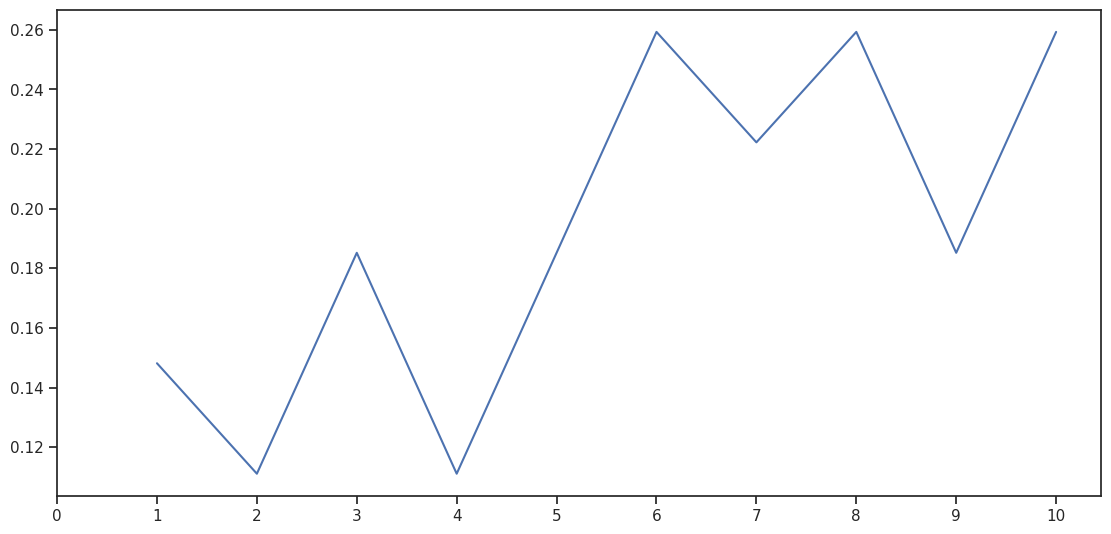

Accuracies for different values of n are: [0.14814815 0.11111111 0.18518519 0.11111111 0.18518519 0.25925926
 0.22222222 0.25925926 0.18518519 0.25925926] with the max value as  0.25925925925925924


In [94]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,y_test)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

In [95]:
model=GaussianNB()
model.fit(X_train,y_train)
prediction6=model.predict(X_test)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,y_test))

The accuracy of the NaiveBayes is 0.14814814814814814


In [97]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10,shuffle=True, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

CV Mean       Std
Linear Svm           0.208333  0.157747
Radial Svm           0.291667  0.157747
Logistic Regression  0.144444  0.122222
KNN                  0.283333  0.124876
Decision Tree        0.181944  0.119549
Naive Bayes          0.208333  0.179699
Random Forest        0.248611  0.127966

<AxesSubplot: >

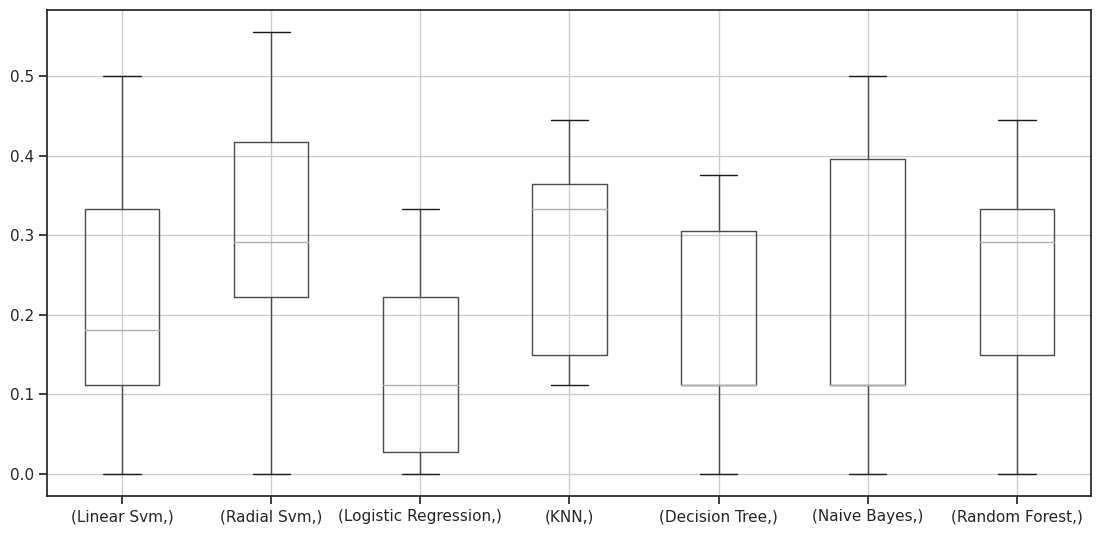

In [98]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

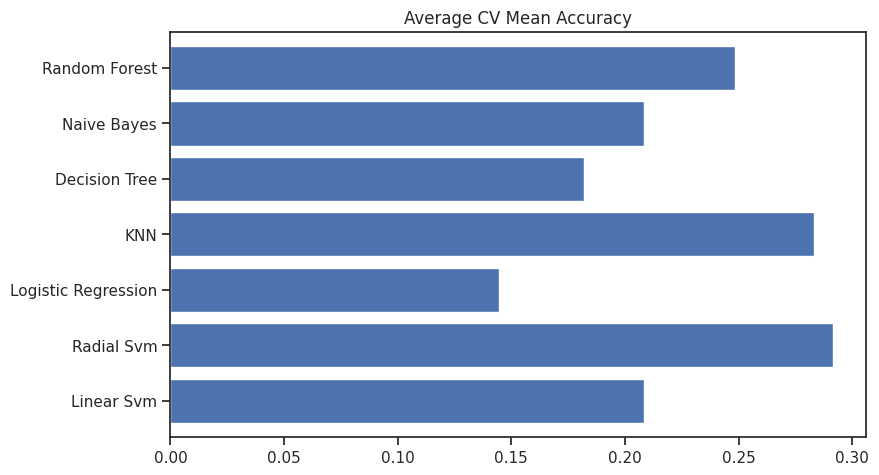

In [99]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

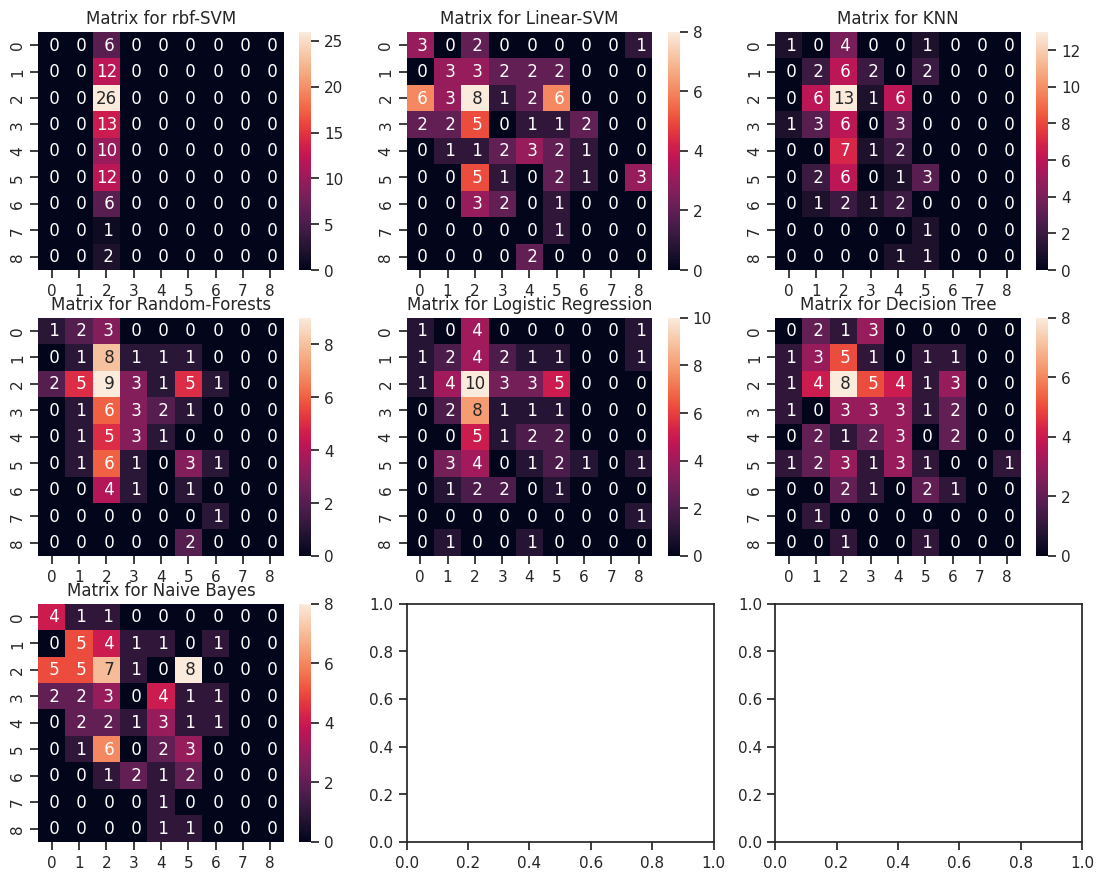

In [102]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

In [104]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.296078431372549
SVC(C=0.05, gamma=0.1)


In [105]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.18169934640522878
RandomForestClassifier(random_state=0)


In [106]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(X_train,y_train)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(X_test,y_test))
cross=cross_val_score(ensemble_lin_rbf,X,y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.2222222222222222
The cross validated score is 0.2847222222222222


In [107]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,y_test))
result=cross_val_score(model,X,y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.2222222222222222
The cross validated score for bagged KNN is: 0.2263888888888889


In [110]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,y_test))
result=cross_val_score(model,X,y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.18518518518518517
The cross validated score for bagged Decision Tree is: 0.2041666666666667


In [111]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.22916666666666666


In [112]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.17777777777777776


In [113]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.31764705882352945
AdaBoostClassifier(learning_rate=0.7, n_estimators=200)


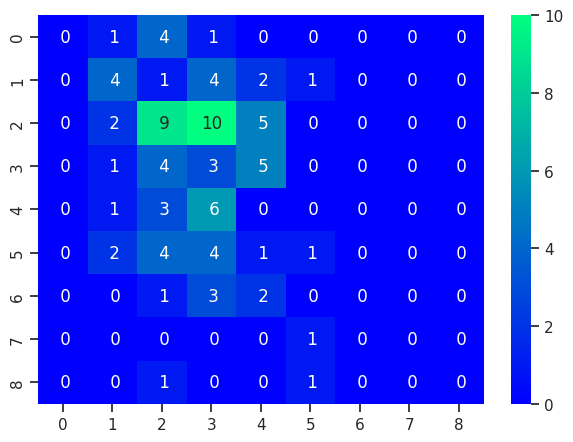

In [116]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,y,cv=10)
sns.heatmap(confusion_matrix(y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

In [119]:
import xgboost as xg

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5 6 7 8], got [1. 2. 3. 4. 5. 6. 7. 8. 9.]

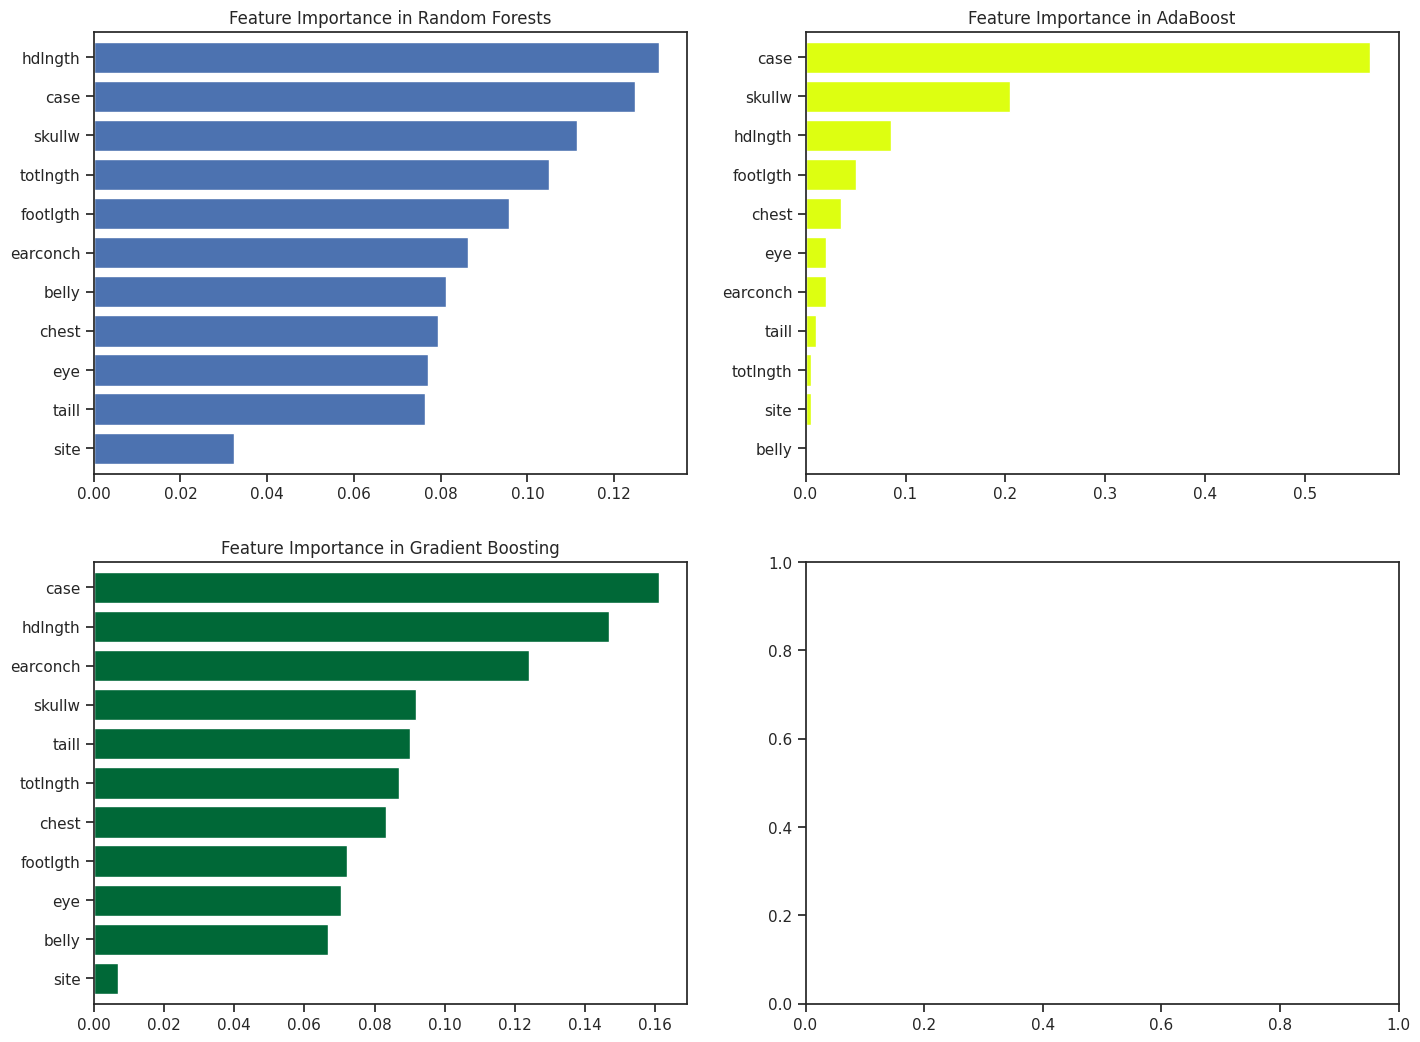

In [120]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()